### Load and Modify Configuration File

In [1]:
from configs.config_loader import load_config
config = load_config('configs/default.yaml')

version : default
seed : 1
y0 : 0.1
T : 15
N_col : 1024
N_hidden : 4
N_neurons : 50
activation : swish
N_epochs : 20000
learning_rate : 0.001
decay_rate : 1.0
freq_log : 100
freq_print : 1000
keys_print : ['loss']
reg_epochs : 0


### Initialize Physics-Informed Neural Network

In [2]:
from model.neural_net import PhysicsInformedNN
PINN = PhysicsInformedNN(config, verbose=True)

2024-08-22 13:35:20.570182: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 13:35:20.632538: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 13:35:20.633773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-22 13:35:21.655391: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "nested_PINN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7801 (30.47 KB)
Trainable params: 7801 (30.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
*** PINN build & init

### Train Physics-Informed Neural Network

In [3]:
training_log = PINN.train()

Training started...
Restarting optimizer
0
    0/20000 | loss: 6.61e-02
 1000/20000 | loss: 1.12e-03
 2000/20000 | loss: 1.46e-03
 3000/20000 | loss: 1.34e-03
 4000/20000 | loss: 1.33e-03
 5000/20000 | loss: 1.31e-03
 6000/20000 | loss: 1.43e-03
 7000/20000 | loss: 1.29e-03
 8000/20000 | loss: 1.48e-03
 9000/20000 | loss: 1.35e-03
10000/20000 | loss: 9.71e-04
11000/20000 | loss: 1.38e-03
12000/20000 | loss: 1.49e-03
13000/20000 | loss: 1.31e-03
14000/20000 | loss: 1.33e-03
15000/20000 | loss: 1.24e-03
16000/20000 | loss: 1.37e-03
17000/20000 | loss: 1.23e-03
18000/20000 | loss: 1.45e-03
19000/20000 | loss: 1.80e-03
*** logs saved ***
### Training finished ###


# Plot Section

In [4]:
from model.plots import learning_curves, toy_example_dynamics, loss_collocation

### Learning Curves

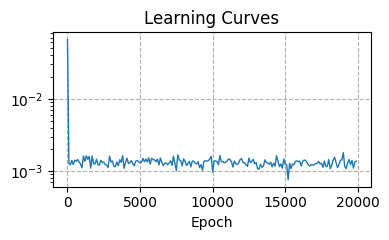

In [5]:
learning_curves(training_log)

### Toy Example Dynamics

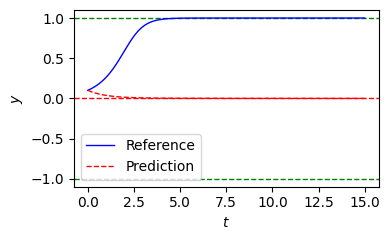

In [6]:
toy_example_dynamics(PINN)

### Loss over collocation points

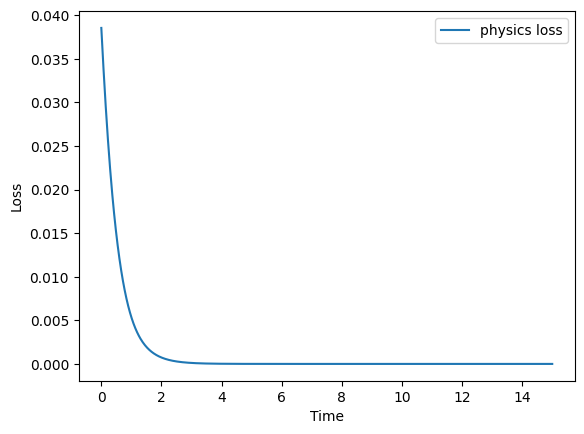

In [7]:
import tensorflow as tf
import numpy as np

t_coll = np.linspace(0, int(config["T"]), 1024).reshape(-1, 1)
t_coll = np.sort(t_coll)

t_coll = tf.convert_to_tensor(t_coll, dtype=tf.float32)

loss_collocation(PINN, t_coll)